# Comparing Categories

If we want to compare data distributions across categories, it can be useful to have a plot that highlights key features (eg, the median and quartiles) whilst eliminating unnecessary detail. Sometimes less is more!

In this notebook we cover `Seaborn` functions that can be used to compare between categories:

- `sns.boxplot()` - compare key descriptives for each category at a glance
- `sns.violinplot()`- compare the full distribution for each catcgory at a glance
- `sns.barplot()` - compare a single statistic (eg the mean) across categories
- `sns.countplot()` - compare the number of datapoints in each category
- `sns.swarmplot()` - plot individual datapoints in each category
- `sns.lineplot()` - plot individual datapoints in each category with linking lines



## Oxford Weather example

We will work with historical data from the Oxford weather centre, which has data for every day in Oxford since 1827!

<img src= "https://raw.githubusercontent.com/jillxoreilly/StatsCourseBook_2024/main/images/OxfordSnow.jpg" width="50%"  />

### Set up Python libraries

As usual, run the code cell below to import the relevant Python libraries

In [1]:
# Set-up Python libraries - you need to run this but you don't need to change it
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import pandas as pd
import seaborn as sns
sns.set_theme(style='white')
import statsmodels.api as sm
import statsmodels.formula.api as smf

### Load and inspect the data

Let's load some historical data about the weather in Oxford, from the file "OxfordWeather.csv". The code below will load this automatically from the internet.

In [2]:
weather = pd.read_csv("https://raw.githubusercontent.com/jillxoreilly/StatsCourseBook_2024/main/data/OxfordWeather.csv")
display(weather)

,YYYY,Month,MM,DD,DD365,Tmax,Tmin,Tmean,Trange,Rainfall_mm
0,1827,Jan,1,1,1,8.3,5.6,7.0,2.7,0.0
1,1827,Jan,1,2,2,2.2,0.0,1.1,2.2,0.0
2,1827,Jan,1,3,3,-2.2,-8.3,-5.3,6.1,9.7
3,1827,Jan,1,4,4,-1.7,-7.8,-4.8,6.1,0.0
4,1827,Jan,1,5,5,0.0,-10.6,-5.3,10.6,0.0
...,...,...,...,...,...,...,...,...,...,...
71338,2022,Apr,4,26,116,15.2,4.1,9.7,11.1,0.0
71339,2022,Apr,4,27,117,10.7,2.6,6.7,8.1,0.0
71340,2022,Apr,4,28,118,12.7,3.9,8.3,8.8,0.0
71341,2022,Apr,4,29,119,11.7,6.7,9.2,5.0,0.0


Have a look at the dataframe. 

What do you think is contained in each column? 

<ul>
<li>Each row is a single day from 1827 to 2022. The columns YYYY,MM,DD give the date.
<li>The columns Tmax, Tmin and Tmean give information about the temperature
<li>We also have a record of the rainfall each day
</ul>

### Boxplot

Say we want to plot the mean temperature in each month of the year. We have almost 200 datapoints for every date (and 30ish dates within each month, so 6000 measurements per month!)

We can summarise the distribution of temperatures in each month using a boxplot:

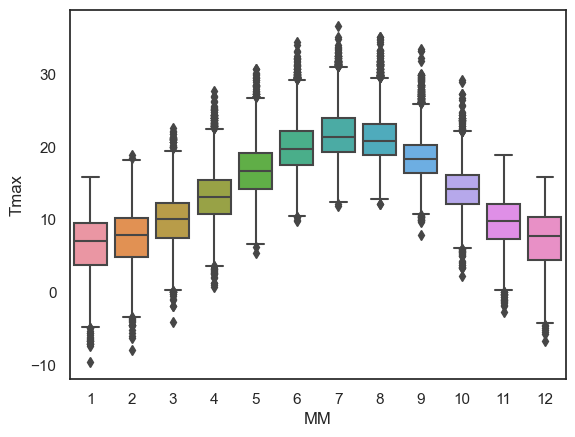

In [3]:
sns.boxplot(data=weather, x="MM", y="Tmax")
plt.show()

The boxplot is designed to show a handful of key features of the data distribution:

* The top and bottom of the box are the 25th and 75th quantiles (1st and 3rd quartiles)
* The line within the box is the 50th centile (median)
* the whiskers are the 'robust range' of the data 
    * in datasets with no outliers, the whiskers reach to the smallest and largest values
    * values more than 1.5 x IQR from the end of the box are treated as outliers and plotted as separate dots

#### Less is more

Using a simple boxplot for each month, we can easily see the **trend across months** for warmer weather in the summer and cooler weather in the winter.

Within each month we can also see some information about the distribution - for example:

* Temperatures are more variable in winter and summer, than in autumn and spring
* In winter, the distribution of temperatures has negative skew (there are some unusually cold years) but in summer the converse is true - this is evident from the position of the median within each box but is clearer in a violinplot (see below)


## Violinplot

Using Python, you can make a slighly fancier version of the boxplot called a **violinplot**. 

The violinplot shows the full distribution of data rather than the summary captured in a boxplot - the violin body is basically a KDE plot.

Let's give it a try using the function `sns.violinplot()`

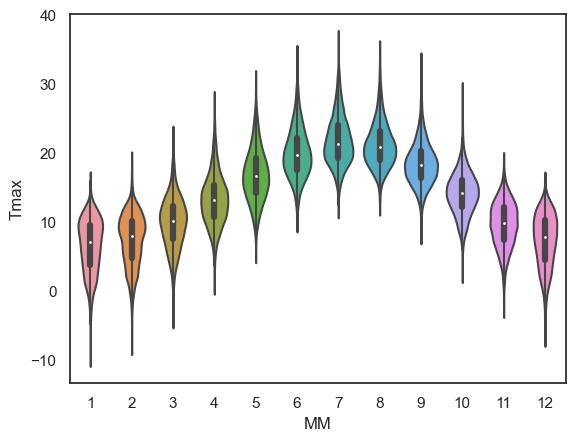

In [4]:
sns.violinplot(data=weather, x="MM", y="Tmax")
plt.show()

This is a nice compromise - still easy to "eyeball" the pattern across categories (in this case, across months) but giving plenty of detail within each category also

Note for example that the trend for:

* negative skew in temperature in winter (outliers are cold days)
* positive skew in summer (outliers are hot days)

...is much more clearly visible in the violin plot than in a box plot.

#### Exercises

Try the following quick exercise:

In [5]:
# make a violin plot showing the minimum temperature in each month
# Your code here!

## Barplot

Sometimes, we want to show even less information, for example just the mean or median for each category.

We can do this using `sns.barplot()`.

Say I want to plot the mean value of the maximum daily temperature (Tmax) in each month:

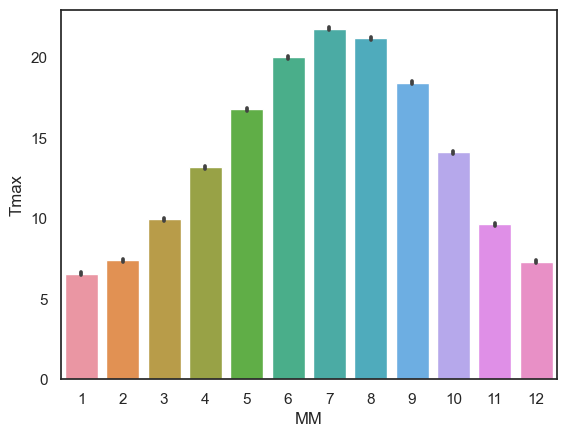

In [6]:
sns.barplot(data=weather, x='MM', y='Tmax')
plt.show()

The height of each bar is the mean temperature in that month; the error bars show the 95% confidence interval (but could be altered to show the standard deviation or standard error if you liked - don't worry if these terms are unfamiliar as confidence intervals and standard error will be covered later in the course)

#### Exercises

Try the following quick exercise:

In [7]:
# make a bar plot showing the mean rainfall in each month

## Countplot

Sometimes we are just interested in how many data points fall in each category.

Since there isn't a straightforward and compelling example with the weather dataset, here is one using the *Titanic* dataset that comes with `seaborn`:

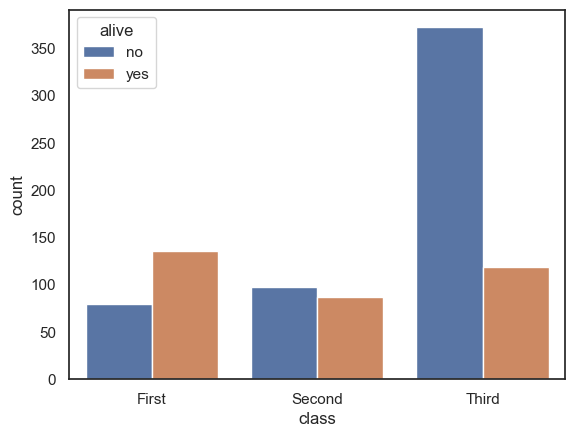

In [8]:
titanic = sns.load_dataset("titanic")
sns.countplot(data=titanic, x='class', hue='alive')
plt.show()

Back to the weather data - one thing we could easily count is the number of instances of each date (1st of the month, 2nd of the month, 3rd of the month....)

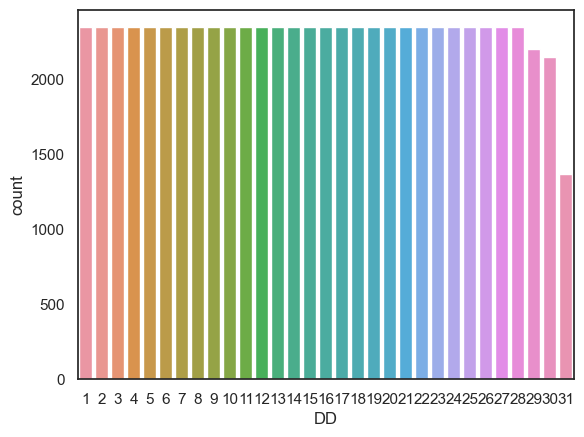

In [9]:
sns.countplot(data=weather, x='DD')
plt.show()

Another way we could use `sns.countplot()` is by creating a dataframe that contains only days fulfilling some criterion (eg, days with no rain) and then make a countplot, as follows:

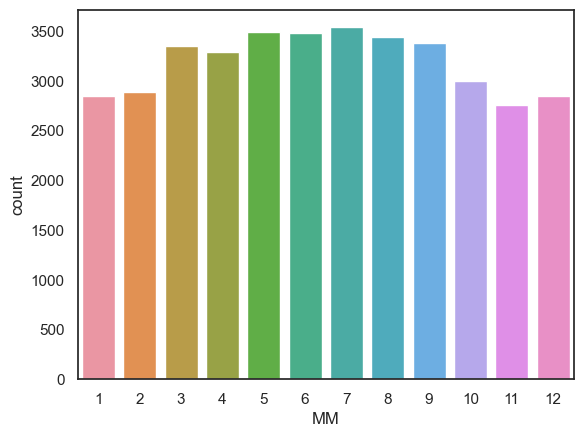

In [10]:
drydays = weather.query('Rainfall_mm == 0') # creates a whole new dataframe with only the 0mm rainfall days
sns.countplot(data=drydays, x='MM') # then count the number of days in each month
plt.show()

#### Exercises

Can you use `sns.countplot()` to show the number of days with frost (Tmin < 0) in each month?

In [11]:
# your code here

## Swarmplot

For small-ish datasets, it can be good to plot individual datapoints instead of, or as well as, a plot of the distribution.

Consider the following made-up dataset containing interview scores for 10 Oxford applicants, who were each seen by three interviewers:


In [12]:
InterviewScores = pd.read_csv("https://raw.githubusercontent.com/jillxoreilly/StatsCourseBook_2024/main/data/CluedoInterview.csv")
display(InterviewScores)

,Professor Green,Professor Peacock,Professor Plum
0,45,52,55
1,47,54,59
2,50,55,60
3,51,55,61
4,53,56,64
5,53,57,66
6,54,61,69
7,54,63,70
8,56,63,72
9,58,63,72


Given that this is a small data set we may wish to plot the students' scores from each interviewer.

We can do this using a swarmplot:


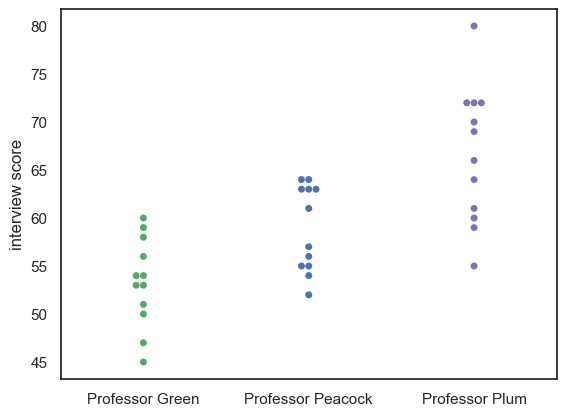

In [13]:
sns.swarmplot(data=InterviewScores, palette=['g','b','m']) # we may as well make the colours meaningful ;-))
plt.ylabel('interview score')
plt.show()

Maybe it would be nice to add a violinplot for each distribution as well:

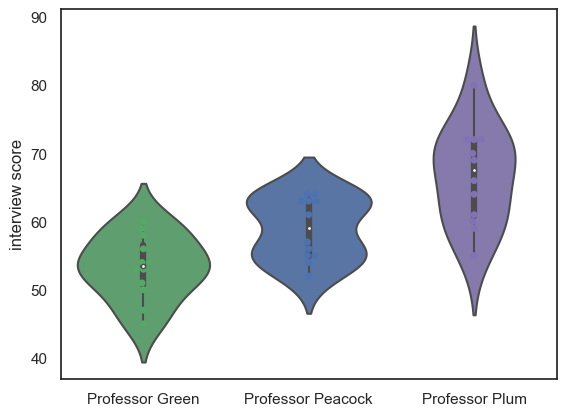

In [14]:
sns.swarmplot(data=InterviewScores, palette=['g','b','m']) # we may as well make the colours meaningful ;-))
sns.violinplot(data=InterviewScores, palette=['g','b','m'], fill=False ) # we may as well make the colours meaningful ;-))
plt.ylabel('interview score')
plt.show()

**Note-**

We can see that each professor gives a different mean and range of scores

## Lineplot

- `sns.lineplot(data = df.T)`

In the violin/swarm plot above, an important feature of the dataset is lost. 

The data set contains three scores for each student (we can think of this as a *repeated measures* design), so an important question to ask is whether the professors were consistent:
* Professor Plum gives higher and momre spread-out scores othan Professor Green
* But do students who score well with Professor Plum also score well with Professor Green?

Currently we can's answer that question, as we can see the students' individual scores from each professor, but we don't know which dot in Professor Plum's column corresponds to which dot in Professors Green and Peacock's columns.

We can use the function `sns.lineplot()` to help us here:

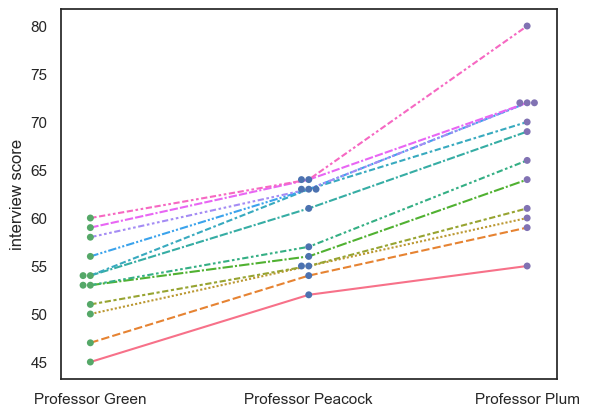

In [15]:
sns.swarmplot(data=InterviewScores, palette=['g','b','m'])
#sns.violinplot(data=InterviewScores, palette=['g','b','m'], fill=False ) 
sns.lineplot(data=InterviewScores.T, legend=False)
plt.ylabel('interview score')
plt.show()

**Note-**

We can see that, despite the different distributions of marks for each Professor, the students who do well with one professor tend to do well with the others; in other words the interviewers are consistent in their ranking of the students, if not in their numerical marks.

For comparison, an inconsistent dataset would look like this:

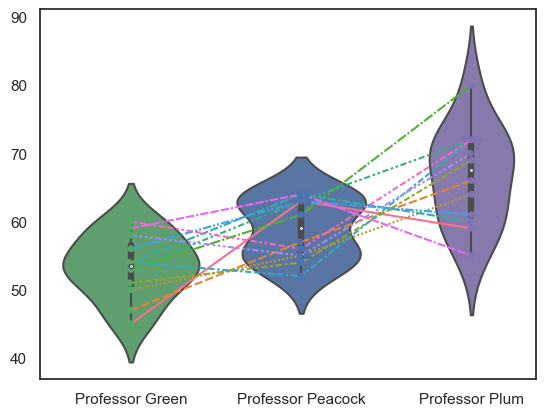

In [16]:
InterviewScoresShuffle = pd.read_csv("https://raw.githubusercontent.com/jillxoreilly/StatsCourseBook_2024/main/data/CluedoInterviewShuffle.csv")
sns.swarmplot(data=InterviewScoresShuffle, palette=['g','b','m']) 
sns.violinplot(data=InterviewScoresShuffle, palette=['g','b','m'], fill=False ) 
sns.lineplot(data=InterviewScoresShuffle.T, legend=False)
plt.show()

### Note - Transpose

- `df.T`

To get a lineplot of categorical data, the syntax is a little fiddly. If we just run `sns.lineplot()` on our dataframe, it will try to plot each **column** as a line.

Repeated measures data such as these are most often tabulated as *wideform data* (each row is an individual, and each column is a measurement for that given individual), as in this dataset. Therefore we would like to plot each *row* as a line, not each column as a line.

We trick `sns.lineplot()` into plotting each row (individual person) as aa line, by **transposing** the dataframe (making the rowns into columns and vice versa), hence instead of `data=InterviewScores` we told `sns.lineplot()` that `data=InterviewScores.T`:

In [17]:
InterviewScores.T

,0,1,2,3,4,5,6,7,8,9,10,11
Professor Green,45,47,50,51,53,53,54,54,56,58,59,60
Professor Peacock,52,54,55,55,56,57,61,63,63,63,64,64
Professor Plum,55,59,60,61,64,66,69,70,72,72,72,80


For **longform data** we can simply use the `hue` property of `sns.lineplot()` to get separate lines, no need to transpose anything.

Here is the interview dataset in longform:

In [18]:
InterviewScoresLongform = pd.read_csv("https://raw.githubusercontent.com/jillxoreilly/StatsCourseBook_2024/main/data/CluedoInterviewLongform.csv")
InterviewScoresLongform

,studentID,Interviewer,Score
0,71215,Professor Green,45
1,71591,Professor Green,47
2,71616,Professor Green,50
3,72220,Professor Green,51
4,74952,Professor Green,53
5,75323,Professor Green,53
6,75524,Professor Green,54
7,75716,Professor Green,54
8,76917,Professor Green,56
9,77180,Professor Green,58


... and here is how we plot it:

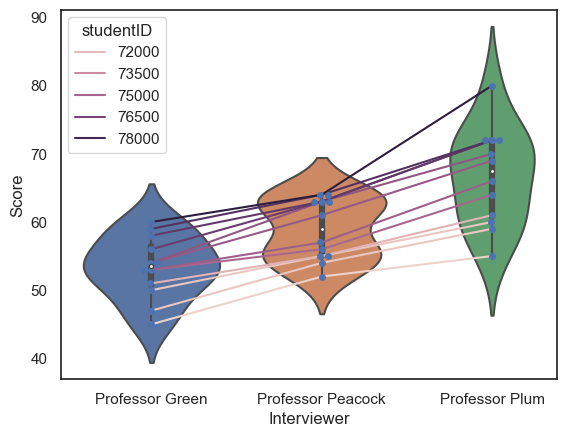

In [19]:
sns.swarmplot(data=InterviewScoresLongform, x='Interviewer', y="Score") 
sns.violinplot(data=InterviewScoresLongform,  x='Interviewer', y="Score")
sns.lineplot(data=InterviewScoresLongform, x='Interviewer', y="Score", hue='studentID')
plt.show()